In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [36]:
import utm

# read data

In [80]:
gas = pd.read_csv('Geochemistry Data/CNS_gas_train.csv')

In [5]:
oil = pd.read_csv('Geochemistry Data/CNS oil.csv')

In [6]:
rock = pd.read_csv('Geochemistry Data/CNS rock samples.csv')

/home/serj/anaconda3/envs/engine/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,10,16,18,23,37,38,44,45,48,49,58,92,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
prod = pd.read_csv('Production Data/CNS_Field_Production.csv')

In [37]:
lat = prod['Y'].values
long = prod['X'].values
x, y, num, let = [], [], [], []
for la, lo in zip(lat, long): 
    res = utm.from_latlon(la, lo, force_zone_number=31, force_zone_letter='V')
    x.append(res[0])
    y.append(res[1])
    num.append(res[2])
    let.append(res[3])
prod['x'] = x
prod['y'] = y

In [81]:
gas = gas.loc[1:, :]

In [82]:
gas['WH_LAT'] = pd.to_numeric(gas['WH_LAT'], errors = 'coerce')
gas['WH_LONG'] = pd.to_numeric(gas['WH_LONG'], errors = 'coerce')

In [83]:
gas = gas.loc[(~gas['WH_LAT'].isnull()) & (~gas['WH_LONG'].isnull()), :]

In [125]:
gas['OGA Well Name']

AttributeError: 'Series' object has no attribute 'split'

In [84]:
lat = gas['WH_LAT'].values
long = gas['WH_LONG'].values
x, y, num, let = [], [], [], []
for la, lo in zip(lat, long): 
    res = utm.from_latlon(la, lo, force_zone_number=31, force_zone_letter='V')
    x.append(res[0])
    y.append(res[1])
    num.append(res[2])
    let.append(res[3])
gas['x'] = x
gas['y'] = y

In [33]:
val_wells = ['022/30b-A07',
 '022/30b-A09',
 '022/30b-A10',
 '22/30b-A11Y',
 '22/30b-A11Z',
 '22/30b-A13Z',
 '22/30b-A14',
 '22/30b- 15',
 '22/30b-A16'
            ]

In [115]:
val_coords_wgs = [(57.0315592, 1.953820623),
 (57.03157667, 1.953858125),
 (57.03158618, 1.95377837),
 (57.0315957, 1.95369845),
 (57.03160357, 1.953815702),
 (57.03219566, 1.955319868),
 (57.03222264, 1.955277617),
 (57.03224012, 1.955315282),
 (57.0322575, 1.955352614),
 (57.16696788, 0.825063652),
 (57.38602717, 0.921277581)]
val_coords = []
for la, lo in val_coords_wgs: 
    val_coords.append(utm.from_latlon(la, lo, force_zone_number=31, force_zone_letter='V')[:2])

In [116]:
val_coords = np.array(val_coords)

In [117]:
val_coords[0, :]

array([ 436502.06779036, 6321385.33675766])

In [118]:
val_coords

array([[ 436502.06779036, 6321385.33675766],
       [ 436504.37366482, 6321387.24644381],
       [ 436499.54936901, 6321388.37914635],
       [ 436494.71507856, 6321389.51312105],
       [ 436501.84478892, 6321390.28008451],
       [ 436594.14428062, 6321454.78700875],
       [ 436591.62595839, 6321457.82933976],
       [ 436593.94166115, 6321459.74003714],
       [ 436596.23698133, 6321461.63991415],
       [ 368482.50886152, 6338070.08970021],
       [ 375043.88452599, 6362267.64849345]])

In [119]:
gas_temp = gas[(gas['x'] > 370000) & (gas['x'] < 410000) & (gas['y'] > 6370000)]

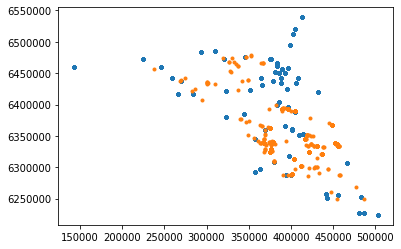

In [120]:
plt.plot(prod['x'], prod['y'], '.')
plt.plot(gas['x'], gas['y'], '.')

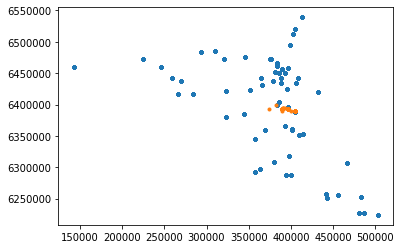

In [121]:
plt.plot(prod['x'], prod['y'], '.')
plt.plot(gas_temp['x'], gas_temp['y'], '.')

In [112]:
gas_temp[gas_temp['SH_FORM'] == 'SELE']['SH_CDATE']

1359    10-10-09 0:00
1377    08-10-13 0:00
1378    08-10-13 0:00
1379    08-10-13 0:00
1380    08-10-13 0:00
1381    08-10-13 0:00
1382    08-10-13 0:00
1383    08-10-13 0:00
1384    08-10-13 0:00
1385    08-10-13 0:00
1386    08-10-13 0:00
1387    08-10-13 0:00
1388    08-10-13 0:00
1389    08-10-13 0:00
1390    08-10-13 0:00
1391    08-10-13 0:00
1392    08-10-13 0:00
1393    08-10-13 0:00
1394    08-10-13 0:00
1395    08-10-13 0:00
1396    08-10-13 0:00
1397    08-10-13 0:00
1398    08-10-13 0:00
1399    08-10-13 0:00
1400    08-10-13 0:00
1401    08-10-13 0:00
1402    08-10-13 0:00
1403    08-10-13 0:00
1404    08-10-13 0:00
1405    08-10-13 0:00
1406    08-10-13 0:00
1407    08-10-13 0:00
1408    08-10-13 0:00
1409    08-10-13 0:00
Name: SH_CDATE, dtype: object

In [107]:
gas_temp['SH_FORM'].value_counts()

SELE               34
SELE (S1)          32
FULMAR             11
LARK                7
BALDER              7
FULMAR B            4
HEATHER             4
BALDER (T90)        3
KIMMERIDGE          3
PENTLAND            2
HORDA (H2)          2
SELE (S2A)          2
HUGIN B             2
SELE (S2B)          2
SELE (2B)           2
FORTIES             2
HUGIN A             2
HUGIN MBR SHALE     1
SELE (S3)           1
TAY                 1
HORDA (H1)          1
Name: SH_FORM, dtype: int64

In [105]:
list(gas_temp)

['Country',
 'WELL_NAME',
 'OGA Well Name',
 'WH_SITETYPE',
 'WH_FIELD',
 'WH_BLOCK',
 'WH_LAT',
 'WH_LONG',
 'WH_COORD_SYS',
 'WH_OPERATOR',
 'WH_SPUD_DATE',
 'WH_SPUD_YEAR',
 'WH_COMP_DATE',
 'WH_TD_M',
 'WH_DR_ELEV_M',
 'WH_DEPTH_REF',
 'WH_WATER_DEPTH_M',
 'SAMPLE_ID',
 'SH_DEPTH_TOP_FT',
 'SH_DEPTH_BOT_FT',
 'SH_SAMPLE_TYPE',
 'SH_SAMPLE_SUB_TYPE',
 'SH_ORIG',
 'SH_ORIG_DESC',
 'SH_TREATMENT',
 'SH_TREATMENT_DESC',
 'SH_LITH',
 'SH_AGE',
 'SH_AGE_BOT',
 'SH_FORM',
 'SH_FORM_BOT',
 'SH_CDATE',
 'SH_COMMENT',
 'SAMPLE_ID_GM',
 'SAMPLE_ID_GDB',
 'SAMPLE_ID_SAM',
 'EXT_SAMPLE_VENDOR',
 'SAMPLE_ID_EXT',
 'GAS_METHOD',
 'GAS_LAB',
 'GAS_ACQ_DATE',
 'GAS_TOTAL_CONCENTRATION',
 'GAS_AIR',
 'GAS_C1',
 'GAS_C2',
 'C2_UNSAT',
 'GAS_C3',
 'C3_UNSAT',
 'GAS_IC4',
 'GAS_NC4',
 'C4_UNSAT',
 'GAS_NEOC5',
 'GAS_IC5',
 'GAS_NC5',
 'C5_UNSAT',
 'GAS_NC5_PLUS',
 'GAS_C6PLUS',
 'GAS_O2',
 'GAS_CO2',
 'GAS_H2',
 'GAS_H2S',
 'GAS_HE',
 'GAS_N2',
 'D_G_METHOD',
 'D_G_LAB',
 'D_G_DATA_TYPE',
 'D_G_ACQ_DAT

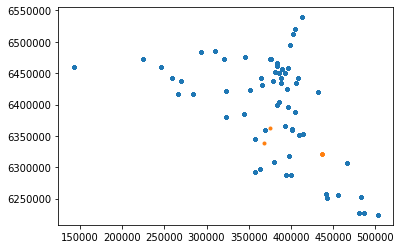

In [122]:
plt.plot(prod['x'], prod['y'], '.')
plt.plot(val_coords[:, 0], val_coords[:, 1], '.')

In [114]:
val_coords

array([[ 436499.75194318, 6321383.42611221],
       [ 436502.06779036, 6321385.33675766],
       [ 436504.37366482, 6321387.24644381],
       [ 436499.54936901, 6321388.37914635],
       [ 436494.71507856, 6321389.51312105],
       [ 436501.84478892, 6321390.28008451],
       [ 436594.14428062, 6321454.78700875],
       [ 436591.62595839, 6321457.82933976],
       [ 436593.94166115, 6321459.74003714],
       [ 436596.23698133, 6321461.63991415]])

In [55]:
gas['GAS_C1'] = pd.to_numeric(gas['GAS_C1'], errors = 'coerce')


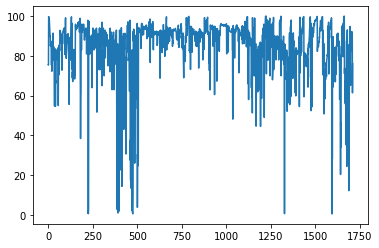

In [56]:
gas['GAS_C1'].plot()

In [34]:
prod[prod['WELLREGNO'].isin(val_wells)]

,X,Y,OBJECTID,FIELDNAME,FIELDAREA,ORGGRPNM,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,...,GCONDVOL,GCONDMBD,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,WELLREGNO
5490,0.495386,57.923473,7491,BRODGAR,CNS,CONOCOPHILLIPS,BRODGAR,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.000000,481.0,481.0,0.097596,22/30b-A11Z
5944,0.010229,57.897786,7945,BUCHAN,CNS,REPSOL SINOPEC RESOURCES,BUCHAN,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.000000,26557.0,26557.0,5.568118,22/30b-A13Z
6430,1.322034,58.735792,6431,BRAE-SOUTH [Part of BRAE],CNS,ROCKROSE ENERGY,BRAE SOUTH,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,1015.0,1015.0,0.205947,24704.0,24704.0,5.012521,22/30b- 15
7052,2.449420,56.896138,5053,BLANE,CNS,REPSOL SINOPEC RESOURCES,BLANE,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.000000,205.0,205.0,0.043154,22/30b-A11Y
8952,1.857774,57.922604,11953,DRAKE,CNS,ROYAL DUTCH SHELL,DRAKE,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.000000,4061.0,4061.0,0.823990,22/30b-A14
12157,-0.067642,58.362727,12158,DUART,CNS,REPSOL SINOPEC RESOURCES,DUART,P,Oil Field Exporting to Pipeline,Offshore,...,NaN,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,0.000000,22/30b-A16


In [12]:
gas['SH_FORM'].value_counts()

HOD                     133
Valhall                 105
Hod                      79
Skagerrak                76
SELE                     73
FULMAR                   71
Sele                     63
TOR                      63
Tor                      47
HEATHER                  47
VALHALL                  41
Fulmar                   38
Heather                  38
Horda                    34
SELE (S1)                32
Pentland                 27
LARK                     27
Kimmeridge Clay          25
KIMMERIDGE CLAY          24
PENTLAND                 24
Lark                     22
HORDA                    22
KIMMERIDGE               20
SKAGERRAK                19
FORTIES                  18
Herring                  17
Ekofisk                  16
HERRING                  12
JUDY SS                  12
BALDER                   11
                       ... 
HORDA (TAY)               2
SELE (2B)                 2
HORDA (H2)                2
SELE S3/2                 2
VALHALL CLAY        

# analyse rock

In [112]:
rock['WH_LAT'] = pd.to_numeric(rock['WH_LAT'], errors = 'coerce')

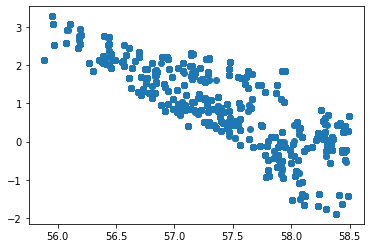

In [118]:
plt.plot(rock['WH_LAT'], rock['WH_LONG'], 'o')

In [122]:
rock['SH_DEPTH_TOP_FT'] = pd.to_numeric(rock['SH_DEPTH_TOP_FT'], errors = 'coerce')

In [123]:
rock['SH_DEPTH_BOT_FT'] = pd.to_numeric(rock['SH_DEPTH_BOT_FT'], errors = 'coerce')

In [124]:
rock['depth'] = rock['SH_DEPTH_TOP_FT'] + (rock['SH_DEPTH_BOT_FT'] - rock['SH_DEPTH_TOP_FT']) / 2

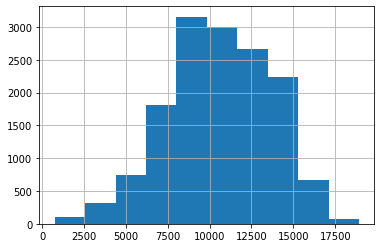

In [127]:
rock['SH_DEPTH_TOP_FT'].hist()

In [128]:
rock['RP_METHOD'].value_counts()

RockEval        4586
Oil analyzer    2174
ROCKEVAL          11
1.1                9
1.3                4
0.9                3
1                  3
20120427           2
0.6                2
2.1                2
1.2                2
2.3                1
0.7                1
2                  1
0.1                1
1.4                1
1.6                1
0.8                1
0.2                1
0                  1
0.5                1
Name: RP_METHOD, dtype: int64

In [134]:
rockre = rock[(rock['RP_METHOD'] == 'RockEval') & (~rock['WH_LAT'].isnull()) & (~rock['WH_LONG'].isnull())] 

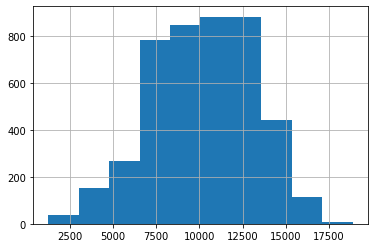

In [137]:
rockre['SH_DEPTH_TOP_FT'].hist()

## well 013/28-01

In [144]:
r013 = rockre[rockre['WELL_NAME'] == '013/28-01']

In [152]:
r013 = r013.sort_values(by='SH_DEPTH_TOP_FT').reset_index()

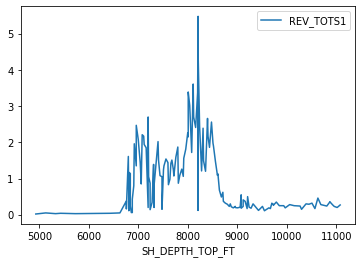

In [157]:
r013.plot(x = 'SH_DEPTH_TOP_FT', y='REV_TOTS1')

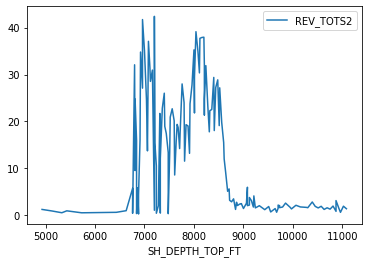

In [158]:
r013.plot(x = 'SH_DEPTH_TOP_FT', y='REV_TOTS2')

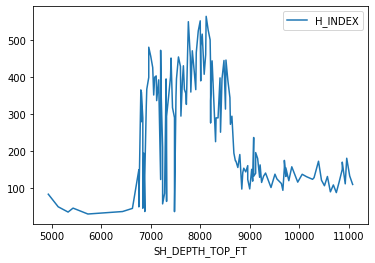

In [171]:
r013.plot(x = 'SH_DEPTH_TOP_FT', y='H_INDEX')

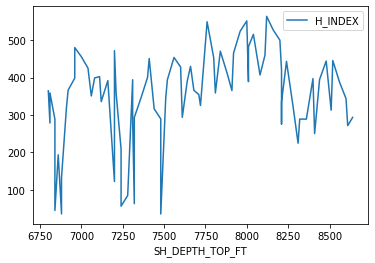

In [172]:
r013[r013['FORMATION'] == 'Kimmeridge Clay Formation'].plot(x = 'SH_DEPTH_TOP_FT', y='H_INDEX')

# Kimmeridge Clay Formation

In [176]:
rkim = rockre[rockre['FORMATION'] == 'Kimmeridge Clay Formation']

In [184]:
rkim[rkim['WELL_NAME'] == '020/06-02']['SH_DEPTH_TOP_FT']

9959     9000.00
9961     9100.00
9962     8800.00
9963     9300.00
9964     9100.00
9966     9000.00
9968     9300.00
9969     8800.00
9975     9189.99
9976     9339.99
9978     8860.01
9980     8920.01
9984     9129.99
9996     9070.01
10007    8770.01
10009    9010.01
10010    9400.00
10014    8800.00
10015    9250.00
Name: SH_DEPTH_TOP_FT, dtype: float64

In [195]:
wells_coord = rkim.groupby(['WELL_NAME'])['SH_DEPTH_TOP_FT'].max()

In [245]:
wells_coord['SH_DEPTH_TOP_FT_min'] = rkim.groupby(['WELL_NAME'])['SH_DEPTH_TOP_FT'].min()

In [189]:
all_wells = rkim.groupby(['WELL_NAME']).last()

In [199]:
wells_coord = pd.DataFrame(wells_coord)

In [200]:
wells_coord['lat'] = all_wells['WH_LAT']
wells_coord['long'] = all_wells['WH_LONG']

In [233]:
wells_coord.head()

,SH_DEPTH_TOP_FT,lat,long
WELL_NAME,,,
013/17-01,5850.00,58.437791,-1.642265
013/18-01,3950.00,58.485968,-1.434328
013/19-01,3700.00,58.412077,-1.391796
013/22a-01,3479.99,58.297846,-1.762745
013/28-01,8639.99,58.002866,-1.523642


In [237]:
wells_coord['lat'].min(), wells_coord['lat'].max()

(55.88419662, 58.4859679)

In [238]:
wells_coord['long'].min(), wells_coord['long'].max()

(-1.762744633, 2.753918567)

In [229]:
X, Y = np.meshgrid(wells_coord['lat'], wells_coord['long'])

In [235]:
from scipy import interpolate

In [236]:
f = interpolate.interp2d(wells_coord['lat'], wells_coord['long'], wells_coord['SH_DEPTH_TOP_FT'], kind='linear', bounds_error=True)

/home/serj/anaconda3/envs/engine/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,13 m=112 fp=25241678.173904 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [241]:
wells_coord.head()

,SH_DEPTH_TOP_FT,lat,long
WELL_NAME,,,
013/17-01,5850.00,58.437791,-1.642265
013/18-01,3950.00,58.485968,-1.434328
013/19-01,3700.00,58.412077,-1.391796
013/22a-01,3479.99,58.297846,-1.762745
013/28-01,8639.99,58.002866,-1.523642


In [239]:
X = np.arange(wells_coord['long'].min(), wells_coord['long'].max(), 0.05)
Y = np.arange(wells_coord['lat'].min(), wells_coord['lat'].max(), 0.05)

In [240]:
X, Y = np.meshgrid(X, Y)

In [248]:
wells_coord[['SH_DEPTH_TOP_FT', 'SH_DEPTH_TOP_FT_min']]

,SH_DEPTH_TOP_FT,SH_DEPTH_TOP_FT_min
WELL_NAME,,
013/17-01,5850.00,5229.99
013/18-01,3950.00,3870.01
013/19-01,3700.00,3700.00
013/22a-01,3479.99,3470.01
013/28-01,8639.99,6800.00
013/28-02,9020.01,7179.99
013/30-01,7639.99,7639.99
014/18-01,8989.99,8200.00
014/19-02,8120.01,7970.01


<IPython.core.display.Javascript object>


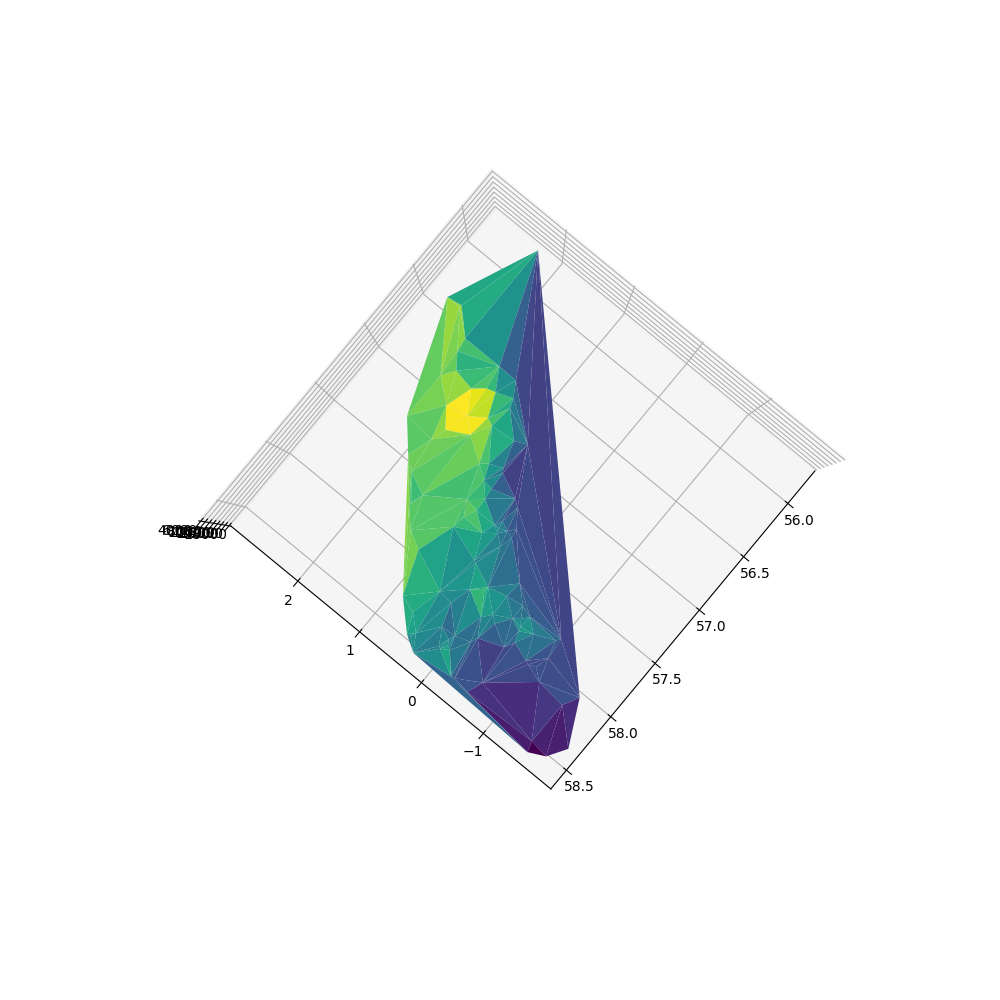

In [247]:
%matplotlib notebook
# Make the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
# ax.plot_trisurf(wells_coord['lat'],wells_coord['long'], wells_coord['SH_DEPTH_TOP_FT'], cmap=plt.cm.viridis, linewidth=0.2)
ax.plot_trisurf(wells_coord['lat'],wells_coord['long'], wells_coord['SH_DEPTH_TOP_FT_min'], cmap=plt.cm.viridis, linewidth=0.2)

plt.show()
 
# # to Add a color bar which maps values to colors.
# surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# fig.colorbar( surf, shrink=0.5, aspect=5)
# plt.show()
 
# # Rotate it
# ax.view_init(30, 45)
# plt.show()
 
# # Other palette
# ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
# plt.show()

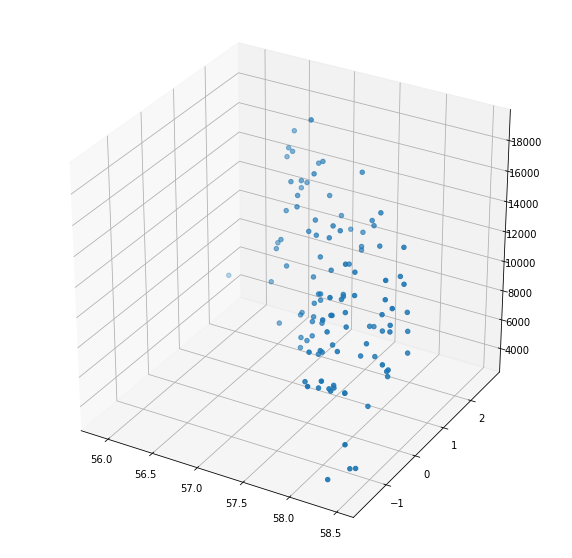

In [228]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X = wells_coord['lat']
Y = wells_coord['long']
Z = wells_coord['SH_DEPTH_TOP_FT']

# Plot a basic wireframe.
ax.scatter(X, Y, Z)

plt.show()

In [205]:
wells_coord.head()

,SH_DEPTH_TOP_FT,lat,long
WELL_NAME,,,
013/17-01,5850.00,58.437791,-1.642265
013/18-01,3950.00,58.485968,-1.434328
013/19-01,3700.00,58.412077,-1.391796
013/22a-01,3479.99,58.297846,-1.762745
013/28-01,8639.99,58.002866,-1.523642


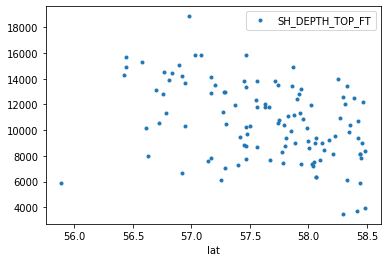

In [220]:
wells_coord.plot(x='lat', y='SH_DEPTH_TOP_FT', style='.')

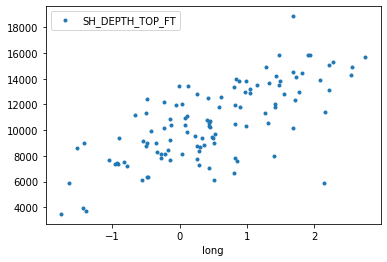

In [221]:
wells_coord.plot(x='long', y='SH_DEPTH_TOP_FT', style='.')

ValueError: Argument Z must be 2-dimensional.

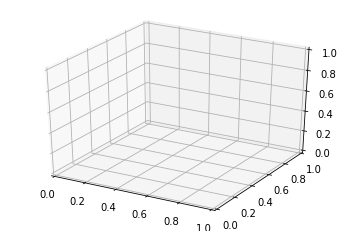

In [213]:
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = wells_coord['lat'].values
Y = wells_coord['long'].values
Z =  wells_coord['SH_DEPTH_TOP_FT'].values
X, Y, Z = np.meshgrid(X, Y, Z)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [201]:
wells_coord

,SH_DEPTH_TOP_FT,lat,long
WELL_NAME,,,
013/17-01,5850.00,58.437791,-1.642265
013/18-01,3950.00,58.485968,-1.434328
013/19-01,3700.00,58.412077,-1.391796
013/22a-01,3479.99,58.297846,-1.762745
013/28-01,8639.99,58.002866,-1.523642
013/28-02,9020.01,58.115816,-1.425950
013/30-01,7639.99,58.095017,-1.055353
014/18-01,8989.99,58.456312,-0.487246
014/19-02,8120.01,58.437398,-0.273295


TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

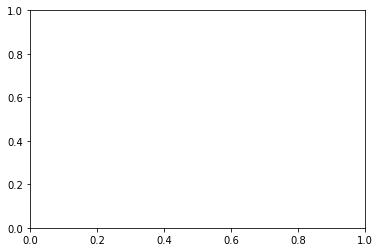

In [204]:
plt.pcolormesh([wells_coord['lat'].values, wells_coord['long'].values], wells_coord['SH_DEPTH_TOP_FT'].values)

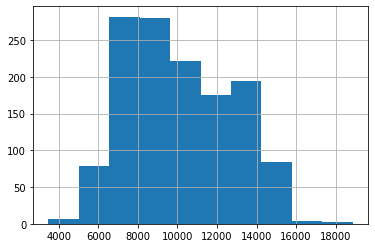

In [179]:
rkim['SH_DEPTH_TOP_FT'].hist()

In [162]:
list(r013)

['index',
 'Country',
 'WELL_NAME',
 'OGA Well Name',
 'WH_SITETYPE',
 'WH_FIELD',
 'WH_BLOCK',
 'WH_LAT',
 'WH_LONG',
 'WH_COORD_SYS',
 'WH_OPERATOR',
 'WH_SPUD_DATE',
 'WH_SPUD_YEAR',
 'WH_COMP_DATE',
 'WH_TD_M',
 'WH_DR_ELEV_M',
 'WH_DEPTH_REF',
 'WH_WATER_DEPTH_M',
 'SAMPLE_ID',
 'SH_DEPTH_TOP_FT',
 'SH_DEPTH_BOT_FT',
 'SH_SAMPLE_TYPE',
 'SH_SAMPLE_SUB_TYPE',
 'SH_ORIG',
 'SH_ORIG_DESC',
 'SH_TREATMENT',
 'SH_TREATMENT_DESC',
 'SH_LITH',
 'EPOCH_TOP',
 'EPOCH_BASE',
 'AGE_TOP',
 'AGE_BASE',
 'GROUP',
 'FORMATION',
 'MEMBER',
 'UNIT',
 'SH_CDATE',
 'SH_COMMENT',
 'SAMPLE_ID_GM',
 'SAMPLE_ID_GDB',
 'SAMPLE_ID_SAM',
 'EXT_SAMPLE_VENDOR',
 'SAMPLE_ID_EXT',
 'TOC_METHOD',
 'TOC_LAB',
 'TOC_ACQ_DATE',
 'TOC',
 'RP_METHOD',
 'RP_LAB',
 'RP_ACQ_DATE',
 'REV_TOTS1',
 'REV_TOTS2',
 'REV_TOTS3',
 'REV_TMAX',
 'H_INDEX',
 'O_INDEX',
 'P_INDEX',
 'MAC_LAB',
 'MAC_METHOD',
 'MAC_DATE',
 'MAC_SEMIQUAN',
 'MAC_SOM_LB_DENS',
 'MAC_SOM_LB_LAYERS',
 'MAC_SOM_LB_LENS',
 'MAC_SOM_NLB_DIFF',
 'MAC_VIT',

In [163]:
r013['FORMATION'].value_counts()

Kimmeridge Clay Formation    81
Heather Formation            23
Valhall Formation             9
Name: FORMATION, dtype: int64

In [ ]:
Horda